In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [37]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine,reflect= True)

In [38]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
measurement = Base.classes.measurement
station= Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session= Session(engine)
conn=engine.connect()

# Exploratory Precipitation Analysis

In [41]:
# Find the most recent date in the data set.
most_recent= session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23')

One year ago: 2016-08-23


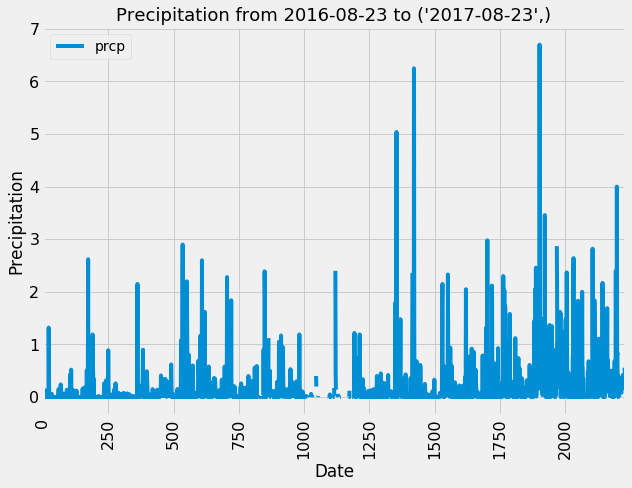

In [56]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Calculate the date one year from the last date in data set.
# Starting from the most recent data point in the database. 
last_year=dt.date(2017,8,23) - dt.timedelta(days=365)
print ("One year ago:", last_year)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter((measurement.date >= last_year))

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_df= pd.DataFrame(precipitation) 
precipitation_df.rename(columns={0:"date",1: "precipitation"},inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df= precipitation_df.sort_values(by='date', ascending=True).dropna()    
sorted_df.head()

precipitation_df.plot(figsize=(9,7), fontsize=16, rot=90)
plt.title('Precipitation from ' + str(last_year) + ' to '+ str(most_recent), fontsize=18)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.tight_layout()
plt.show()

In [57]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number stations in the dataset
stations= session.query(station).distinct().count()
print(stations)

9


In [71]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# find the station with the most temperature observations, then list them all in descending order
busy_station = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).\
               order_by(func.count(measurement.tobs).desc()).all()

busiest = busy_station[0][0]    
print("The busiest Station was"+ str(busiest)+ " with " + str(busy_station[0][1]))
print()
print("Descending order:")
for station, count in busy_station:
    print(str(station)+ " had "+str(count))
        
        

The busiest Station wasUSC00519281 with 2772

Descending order:
USC00519281 had 2772
USC00519397 had 2724
USC00513117 had 2709
USC00519523 had 2669
USC00516128 had 2612
USC00514830 had 2202
USC00511918 had 1979
USC00517948 had 1372
USC00518838 had 511


In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active= 'USC00519281'
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active).scalar()
max_temp= session.query(func.max(measurement.tobs)).filter(measurement.station == most_active).scalar()
avg_temp=session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active).scalar()

print(' The max temperature was ' + str(min_temp))
print(' The min temperature was '+ str(max_temp))
print(' The avergae temperature was '+ str(avg_temp))



 The max temperature was 54.0
 The min temperature was 85.0
 The avergae temperature was 71.66378066378067


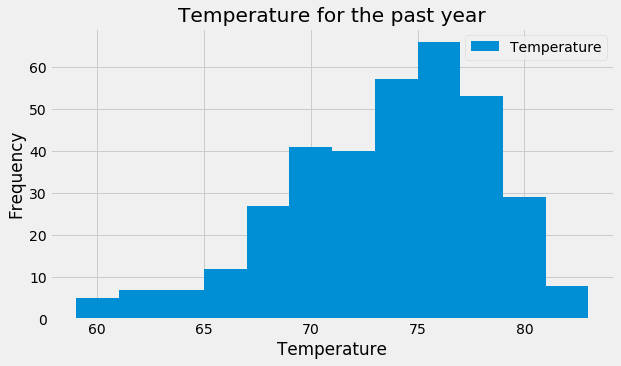

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obser_data= session.query(measurement.date, measurement.tobs).filter\
(measurement.date >= '2016-08-23').filter(measurement.date <= '2017-08-23').filter\
(measurement.station == most_active).all()
last_df= pd.DataFrame(obser_data)
last_df.plot(kind="hist",bins=12,density=False,figsize=(9,5))
plt.legend(['Temperature'])
plt.xlabel('Temperature')
plt.title('Temperature for the past year')
plt.show()

# Close session

In [87]:
# Close Session
session.close()